In [1]:
from functools import partial
from src.IAMDataset import IAMDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt



In [2]:
dataset = IAMDataset("/Users/tefannastasa/BachelorsWorkspace/BachModels/Playground/HWR/data/raw", "train", None, True)
eos_tkn_id, sos_tkn_id, pad_tkn_id = dataset.embedding_loader.encode_labels([dataset._eos_token, dataset._sos_token, dataset._pad_token])
collate_fn = partial(IAMDataset.collate_fn, pad_val=pad_tkn_id, eos_tkn_idx=eos_tkn_id, returns_writer_id=dataset.return_writer_id)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)


In [3]:
imgs = []
for sample in dataset:
    imgs.append(sample[0])
print(len(imgs))

1539


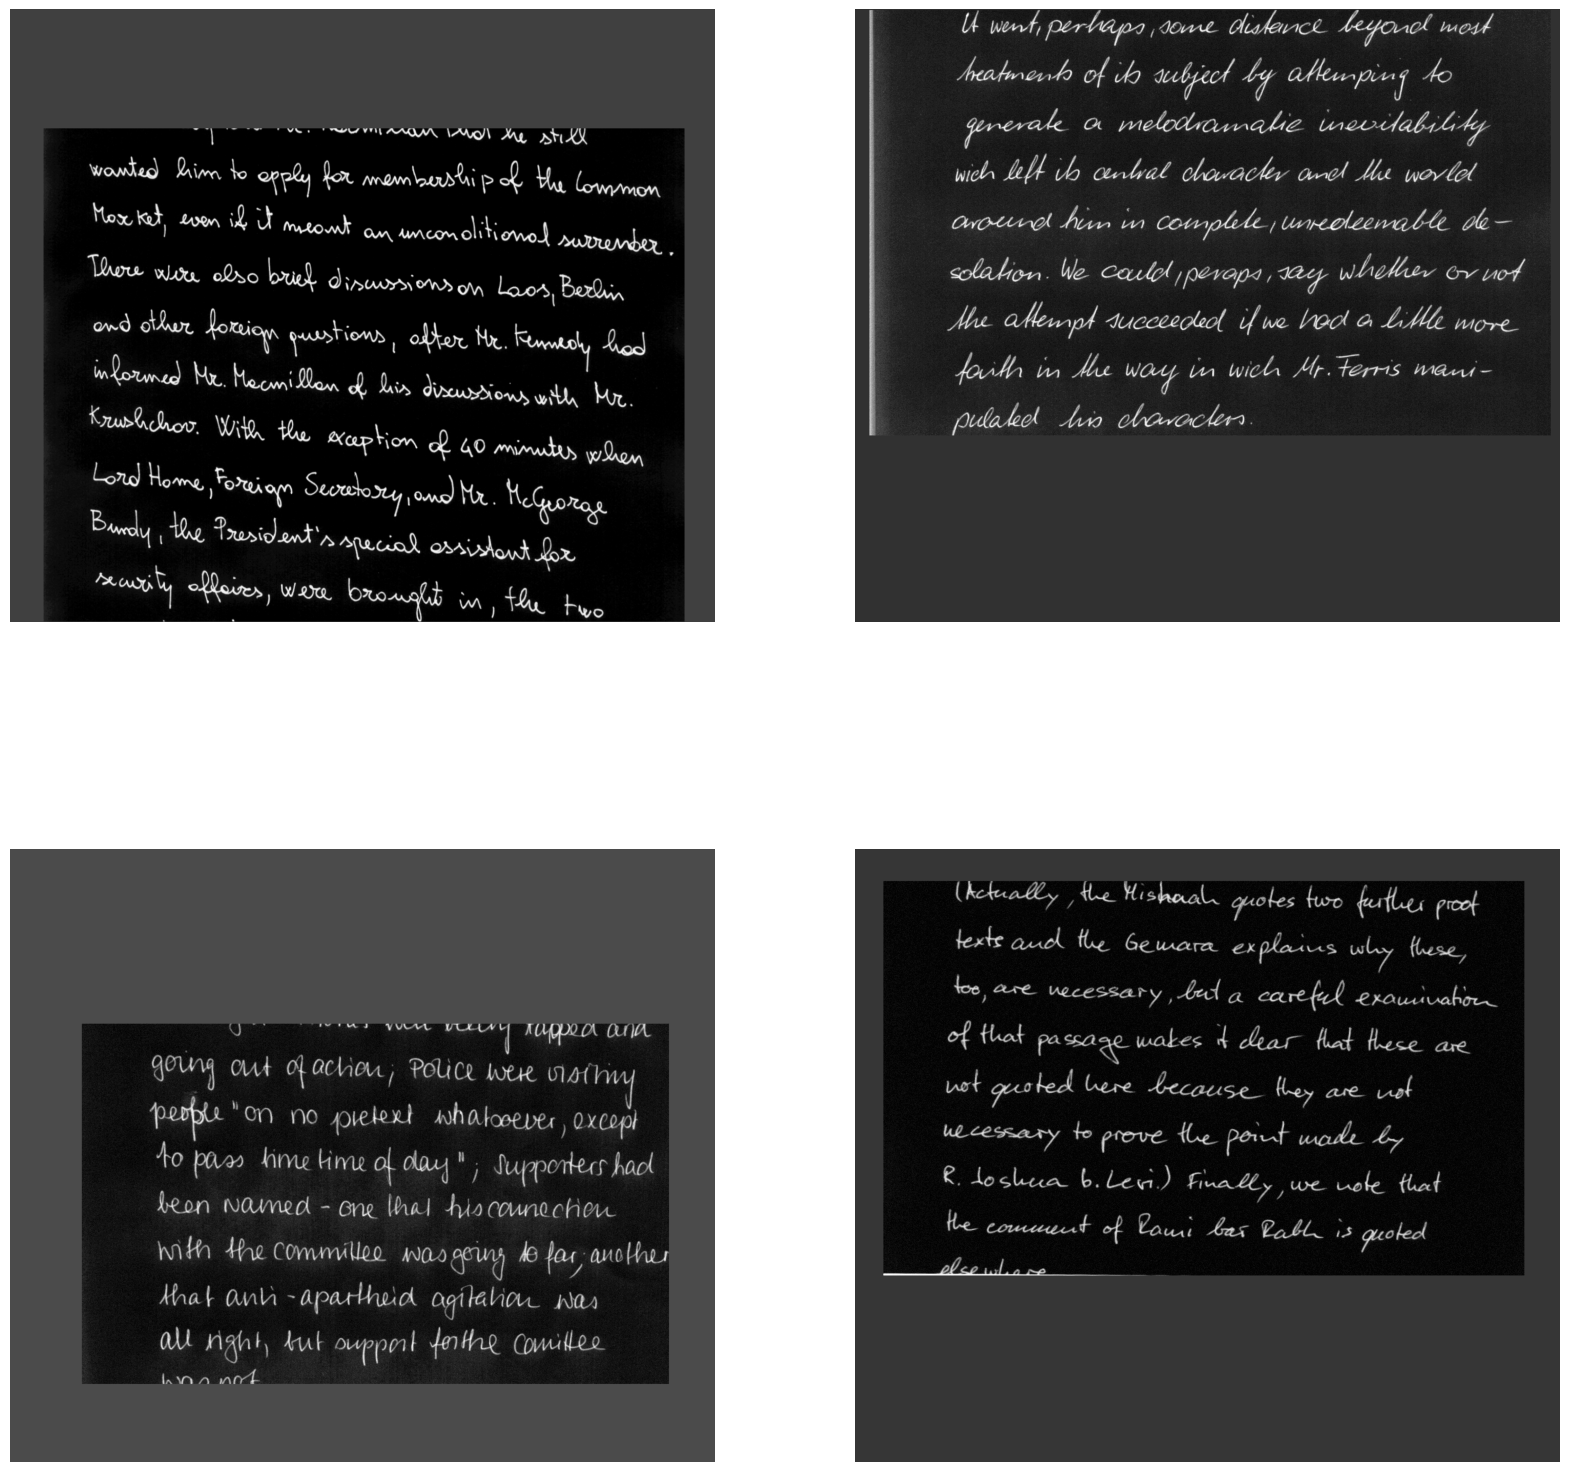

In [4]:

fig, axes = plt.subplots(2, 2, figsize=(20, 20))  # Adjust figsize as needed
for i, ax in enumerate(axes.flat):
    if i < len(imgs):
        np = imgs[i]
        ax.imshow(np, cmap="Greys")
        ax.axis('off')  
    else:
        ax.axis('off')  

In [5]:
import numpy as np
dataset = IAMDataset("/Users/tefannastasa/BachelorsWorkspace/BachModels/Playground/HWR/data/raw", "test", None, True)

images = [a[0] for a in dataset]


In [6]:
max_w = 0
std = 0
mean = 0
cnt = 0
for image in images:
    max_w = max(image.shape[1], max_w)
    mean += np.mean(image)
    std += np.var(image)
    cnt += 1
mean /= cnt
std = np.sqrt(std / cnt)
print(f"Max width: {max_w}, mean: {mean}, STD: {std}")

Max width: 2479, mean: 0.08516995255158194, STD: 0.2864894372839448


In [ ]:
from src.model import FullPageHTR
import torch
image = torch.Tensor(dataset[1][0]).unsqueeze(0)
target = torch.Tensor(dataset[1][1]).unsqueeze(0)
print(image)
model = FullPageHTR(dataset.embedding_loader, num_layers=2)
logits, _, _ = model(image)
print(logits.shape)

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


/Users/tefannastasa/BachelorsWorkspace/BachModels/Playground/HWR/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/tefannastasa/BachelorsWorkspace/BachModels/Playground/HWR/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


torch.Size([1])
